In [1]:
from IPython.display import display, HTML
import pandas as pd
from sqlalchemy import create_engine, text
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [2]:
def display_dataframe(df):
    # Check if the input is a DataFrame
    if not isinstance(df, pd.DataFrame):
        display(df)
        return
    
    # CSS to create a scrollable box
    css = '''
    <style>
        .table {
            overflow: auto;
            white-space: nowrap;
            max-height: 315px;
            width: 100%;
        }
        .table th, .table td {
            vertical-align: top;
            text-align: left;
        }
    </style>
    '''

    # DataFrame in div
    table = f"<div class='table'>{df.to_html()}</div>"

    # Display the table
    display(HTML(css + table))

In [3]:
print(os.listdir('../input/yelp-dataset'))

['Dataset_User_Agreement.pdf', 'yelp_academic_dataset_review.json', 'yelp_academic_dataset_checkin.json', 'yelp_academic_dataset_business.json', 'yelp_academic_dataset_tip.json', 'yelp_academic_dataset_user.json']


In [4]:
with open('../input/yelp-dataset/yelp_academic_dataset_review.json', 'r') as json:
            json_reader = pd.read_json(json, lines=True, chunksize=100000)
            
            chunk_list = []
            
            for chunk in json_reader:
                chunk_list.append(chunk)
                
            review_df = pd.concat(chunk_list, ignore_index=True)

In [5]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [6]:
display_dataframe(review_df.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.",2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines.",2017-01-14 20:54:15


In [7]:
with open('../input/yelp-dataset/yelp_academic_dataset_checkin.json', 'r') as json:
            json_reader = pd.read_json(json, lines=True, chunksize=100000)
            
            chunk_list = []
            
            for chunk in json_reader:
                chunk_list.append(chunk)
                
            checkin_df = pd.concat(chunk_list, ignore_index=True)

In [8]:
checkin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [9]:
display_dataframe(checkin_df.head())

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 21:23:33, 2021-01-20 17:34:57, 2021-04-30 21:02:03, 2021-05-25 21:16:54, 2021-08-06 21:08:08, 2021-10-02 15:15:42, 2021-11-11 16:23:50"
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011-07-18 22:30:31, 2012-09-07 20:28:50, 2013-03-27 15:57:36, 2013-08-13 00:31:34, 2013-08-13 00:31:48, 2013-09-23 17:39:38, 2013-11-18 06:34:08, 2014-04-12 23:04:47"
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012-03-11 10:30:02, 2012-04-24 07:07:59, 2012-04-24 07:43:31, 2013-05-25 16:41:10, 2014-05-02 15:49:55, 2014-09-18 02:28:23, 2014-11-10 15:16:43, 2015-09-27 13:18:32"
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014-09-30 14:41:47, 2014-10-23 18:22:28, 2015-04-27 19:55:00, 2015-09-21 12:52:09, 2015-10-01 12:46:16, 2015-10-22 13:35:04, 2016-01-14 12:27:43, 2016-02-01 15:15:07, 2016-02-11 12:22:47, 2016-03-31 23:15:46, 2016-04-11 13:11:34, 2016-05-25 12:44:11, 2016-06-27 15:46:11, 2016-06-30 15:14:28, 2016-07-28 14:15:59, 2016-09-22 20:05:06, 2016-11-16 19:00:11, 2016-12-27 14:36:14, 2017-01-24 20:18:16, 2017-02-21 16:01:49, 2017-03-21 14:08:44, 2017-05-21 16:07:21, 2017-08-07 14:17:39, 2021-06-21 19:59:50"


In [10]:
with open('../input/yelp-dataset/yelp_academic_dataset_business.json', 'r') as json:
            json_reader = pd.read_json(json, lines=True, chunksize=100000)
            
            chunk_list = []
            
            for chunk in json_reader:
                chunk_list.append(chunk)
                
            business_df = pd.concat(chunk_list, ignore_index=True)

In [11]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [12]:
display_dataframe(business_df.head())

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:0-14:0'}"
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'CoatCheck': 'False', 'RestaurantsTakeOut': 'False', 'RestaurantsDelivery': 'False', 'Caters': 'False', 'WiFi': 'u'no'', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'WheelchairAccessible': 'True', 'HappyHour': 'False', 'OutdoorSeating': 'False', 'HasTV': 'False', 'RestaurantsReservations': 'False', 'DogsAllowed': 'False', 'ByAppointmentOnly': 'False'}","Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', 'Wednesday': '8:0-22:0', 'Thursday': '8:0-22:0', 'Friday': '8:0-23:0', 'Saturday': '8:0-23:0', 'Sunday': '8:0-22:0'}"
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': 'u'free'', 'Alcohol': 'u'none'', 'Caters': 'True'}","Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}"
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': '{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-22:0', 'Friday': '12:0-22:0', 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0'}"


In [13]:
with open('../input/yelp-dataset/yelp_academic_dataset_tip.json', 'r') as json:
            json_reader = pd.read_json(json, lines=True, chunksize=100000)
            
            chunk_list = []
            
            for chunk in json_reader:
                chunk_list.append(chunk)
                
            tip_df = pd.concat(chunk_list, ignore_index=True)

In [14]:
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [15]:
display_dataframe(tip_df.head())

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban sandwiches,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [16]:
with open('../input/yelp-dataset/yelp_academic_dataset_user.json', 'r') as json:
            json_reader = pd.read_json(json, lines=True, chunksize=100000)
            
            chunk_list = []
            
            for chunk in json_reader:
                chunk_list.append(chunk)
                
            user_df = pd.concat(chunk_list, ignore_index=True)

In [17]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [18]:
display_dataframe(user_df.head())

In [19]:
restaurant_count = business_df[
    business_df['categories'].str.lower().str.contains('restaurant', na=False)
].shape[0]

print(f'Restaurant count: {restaurant_count}')

Restaurant count: 52286


In [20]:
open_restaurant_count = business_df[
    (business_df['categories'].str.lower().str.contains('restaurant', na=False))
    &
    (business_df['is_open'] == 1)
].shape[0]

print(f'Open restaurant count: {open_restaurant_count}')

Open restaurant count: 35004


In [21]:
restaurant_df = business_df[
    (business_df['categories'].str.lower().str.contains('restaurant', na=False))
    &
    (business_df['is_open'] == 1)
]

In [22]:
def descriptive_stats(df, col):
    min_col = df[col].min()
    max_col = df[col].max()
    avg_col = df[col].mean()
    median_col = df[col].median()

    stats = {
        f'avg_{col}': avg_col,
        f'min_{col}': min_col,
        f'max_{col}': max_col,
        f'median_{col}': median_col
    }

    stats_df = pd.DataFrame([stats])

    return stats_df

In [23]:
descriptive_stats(restaurant_df, 'review_count')

,avg_review_count,min_review_count,max_review_count,median_review_count
0,104.097789,5,7568,40.0


In [24]:
descriptive_stats(restaurant_df, 'stars')

,avg_stars,min_stars,max_stars,median_stars
0,3.523969,1.0,5.0,3.5


In [25]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [26]:
restaurant_df = remove_outliers(restaurant_df, 'review_count')
restaurant_df.shape 

(31537, 14)

In [27]:
descriptive_stats(restaurant_df, 'review_count')

,avg_review_count,min_review_count,max_review_count,median_review_count
0,55.975426,5,248,33.0


In [28]:
# Top 10 restaurants by total review count 

filtered_business_df = business_df[
    business_df['business_id'].isin(restaurant_df['business_id'])
]


grouped_df = filtered_business_df.groupby('name').agg(
    total_review_count = pd.NamedAgg(column='review_count', aggfunc='sum'),
    avg_stars = pd.NamedAgg(column='stars', aggfunc='mean')
)


top_10 = grouped_df.sort_values('total_review_count', ascending=False).head(10)

display_dataframe(top_10)

,total_review_count,avg_stars
name,,
McDonald's,16490,1.868702
Chipotle Mexican Grill,9071,2.381757
Taco Bell,8017,2.141813
Chick-fil-A,7687,3.377419
First Watch,6761,3.875000
Panera Bread,6613,2.661905
Buffalo Wild Wings,6483,2.344828
Domino's Pizza,6091,2.290210
Wendy's,5930,2.030159


In [29]:
# 10 Restaurants having highest ratings

high_rated = grouped_df.sort_values('avg_stars', ascending=False).head(10)

display_dataframe(high_rated)

,total_review_count,avg_stars
name,,
ā café,48,5.0
Vfw Post 3944,8,5.0
Small Batch Kitchen Cafe and Market,10,5.0
Kensington Pub,9,5.0
Keson Thai Restaurant,23,5.0
Kielbasa Bus,6,5.0
Kika's All Kine Grindz,22,5.0
Kimberton Whole Foods - Collegeville,6,5.0
Kimberton Whole Foods - Malvern,22,5.0


In [30]:
# Top cities having highest retaurants

grouped_df = filtered_business_df.groupby(['city', 'state']).agg(
    avg_ratings = pd.NamedAgg(column='stars', aggfunc='mean'),
    total_review_count = pd.NamedAgg(column='review_count', aggfunc='sum'),
    restaurant_count = pd.NamedAgg(column='business_id', aggfunc='count')
)

top_10 = grouped_df.sort_values('restaurant_count', ascending=False).head(10)

display_dataframe(top_10)

,,avg_ratings,total_review_count,restaurant_count
city,state,,,
Philadelphia,PA,3.532156,175487,3001
Tampa,FL,3.571429,104376,1715
Indianapolis,IN,3.412111,92639,1701
Edmonton,AB,3.509379,45916,1546
Tucson,AZ,3.386187,91613,1419
Nashville,TN,3.493590,87070,1404
New Orleans,LA,3.693676,69239,1012
Saint Louis,MO,3.414303,51490,811
Reno,NV,3.479626,48393,589


In [31]:
review_count_df = business_df[
    business_df['business_id'].isin(restaurant_df['business_id'])
].groupby('business_id').agg(
    total_review_count = pd.NamedAgg(column='review_count', aggfunc='sum')
).reset_index()


tip_count_df = tip_df[
    tip_df['business_id'].isin(tip_df['business_id'])
].groupby('business_id').agg(
    tip_count = pd.NamedAgg(column='business_id', aggfunc='count')
).reset_index()


checkin_count_df = checkin_df[
    checkin_df['business_id'].isin(restaurant_df['business_id'])
].groupby('business_id').apply(
    lambda x: pd.Series({
        'checkin_count': (x['date'].str.count(',') + 1).sum()
    }), include_groups=False
).reset_index()

In [32]:
merged_df = business_df[
    business_df['business_id'].isin(restaurant_df['business_id'])
].merge(review_count_df, on='business_id').merge(tip_count_df, on='business_id').merge(checkin_count_df, on='business_id')

avg_engagement_df = merged_df.groupby('stars').agg(
    avg_stars = pd.NamedAgg(column='stars', aggfunc='mean'),
    avg_review_count = pd.NamedAgg(column='total_review_count', aggfunc='mean'),
    avg_tip_count = pd.NamedAgg(column='tip_count', aggfunc='mean'),
    avg_checkin_count = pd.NamedAgg(column='checkin_count', aggfunc='mean')
).reset_index().sort_values('stars', ascending=True)

display_dataframe(avg_engagement_df)

,stars,avg_stars,avg_review_count,avg_tip_count,avg_checkin_count
0,1.0,1.0,18.053097,2.858407,22.575221
1,1.5,1.5,26.838742,3.911765,38.778905
2,2.0,2.0,31.206510,4.603255,59.780022
3,2.5,2.5,40.820098,6.351524,89.351524
4,3.0,3.0,52.623162,8.339180,116.608460
5,3.5,3.5,68.277075,10.357929,134.828924
6,4.0,4.0,79.111532,11.363172,137.522088
7,4.5,4.5,72.542198,9.054066,95.931648
8,5.0,5.0,41.083665,4.350598,36.073041


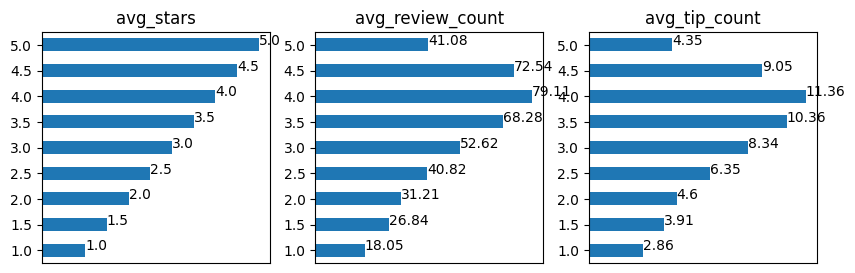

In [33]:
fig, axs = plt.subplots(1, 3, figsize= (10, 3))

for i, ax in enumerate(axs):
    avg_engagement_df.iloc[:, i+1].plot(
        kind= 'barh',
        ax= axs[i],
        xticks=[],
        title= avg_engagement_df.columns[i+1]
    )

    axs[i].set_yticklabels(avg_engagement_df['avg_stars'])

    for j, value in enumerate(avg_engagement_df.iloc[:, i+1]):
            axs[i].text(value, j, round(value, 2))

plt.show()

In [34]:
engagement_df = merged_df.groupby('business_id').agg(
    avg_stars = pd.NamedAgg(column='stars', aggfunc='mean'),
    total_review_count = pd.NamedAgg(column='total_review_count', aggfunc='sum'),
    tip_count = pd.NamedAgg(column='tip_count', aggfunc='sum'),
    checkin_count = pd.NamedAgg(column='checkin_count', aggfunc='sum')
).reset_index()

display_dataframe(engagement_df.head())

,business_id,avg_stars,total_review_count,tip_count,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,4.5,24,4,11
1,--0iUa4sNDFiZFrAdIWhZQ,3.0,14,6,10
2,--epgcb7xHGuJ-4PUeSLAw,3.0,34,6,118
3,--lqIzK-ZVTtgwiQM63XgQ,2.0,15,2,21
4,-09Oc2D14vRnmirPh0vlXw,3.0,135,25,500


In [35]:
engagement_cor_df = engagement_df[['total_review_count', 'tip_count', 'checkin_count']].dropna().corr().copy()

display_dataframe(engagement_cor_df)

,total_review_count,tip_count,checkin_count
total_review_count,1.000000,0.766321,0.626884
tip_count,0.766321,1.000000,0.772088
checkin_count,0.626884,0.772088,1.000000


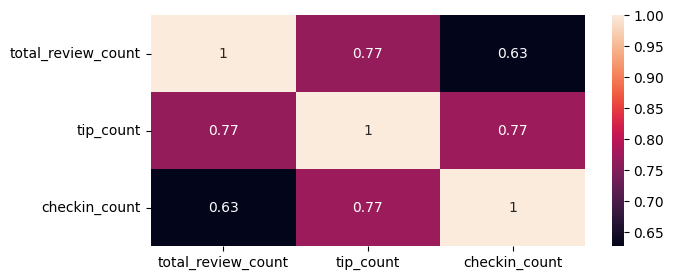

In [36]:
plt.figure(figsize=(7, 3))
sns.heatmap(engagement_cor_df, annot=True)
plt.show()

In [37]:
category_df = merged_df.groupby('business_id').apply(
    lambda x: pd.Series({
        'avg_stars': x['stars'].mean(),
        'total_review_count': x['total_review_count'].sum(),
        'tip_count': x['tip_count'].sum(),
        'checkin_count': x['checkin_count'].sum(),
        'category': 'high-rated' if x['stars'].mean() >= 3.5 else 'low-rated' 
    }), include_groups=False
).reset_index()

display_dataframe(category_df.head())

,business_id,avg_stars,total_review_count,tip_count,checkin_count,category
0,---kPU91CF4Lq2-WlRu9Lw,4.5,24,4,11,high-rated
1,--0iUa4sNDFiZFrAdIWhZQ,3.0,14,6,10,low-rated
2,--epgcb7xHGuJ-4PUeSLAw,3.0,34,6,118,low-rated
3,--lqIzK-ZVTtgwiQM63XgQ,2.0,15,2,21,low-rated
4,-09Oc2D14vRnmirPh0vlXw,3.0,135,25,500,low-rated


In [38]:
category_df.groupby('category')[['total_review_count', 'tip_count', 'checkin_count']].agg('mean')

,total_review_count,tip_count,checkin_count
category,,,
high-rated,72.291062,10.162766,122.066641
low-rated,42.123420,6.541689,88.880828


In [39]:
hr_business_df = business_df.loc[
    (business_df['business_id'].isin(restaurant_df['business_id']))
    &
    (business_df['stars'] >= 3.5),
    ['business_id']
]


hr_temp_df = review_df.loc[
    review_df['business_id'].isin(hr_business_df['business_id']),
    ['business_id', 'date']
]
hr_temp_df['year_month'] = hr_temp_df['date'].dt.strftime('%Y-%m')
hr_temp_df = hr_temp_df[hr_temp_df['year_month'] > '2017']

hr_review_df = hr_temp_df.groupby('year_month').agg(
    review_count = pd.NamedAgg(column='business_id', aggfunc='count')
).reset_index()
    

hr_temp_df = tip_df.loc[
    tip_df['business_id'].isin(hr_business_df['business_id']),
    ['business_id', 'date']
]
hr_temp_df['year_month'] = hr_temp_df['date'].dt.strftime('%Y-%m')
hr_temp_df = hr_temp_df[hr_temp_df['year_month'] > '2017']

hr_tip_df = hr_temp_df.groupby('year_month').agg(
    tip_count = pd.NamedAgg(column='business_id', aggfunc='count')
)

high_rated_df = pd.merge(hr_review_df, hr_tip_df, on='year_month')
high_rated_df = high_rated_df.sort_values(by='year_month', ascending=False)

display_dataframe(high_rated_df.head())

,year_month,review_count,tip_count
60,2022-01,9969,328
59,2021-12,15663,652
58,2021-11,14608,1021
57,2021-10,15944,1091
56,2021-09,14758,1017


In [40]:
lr_business_df = business_df.loc[
    (business_df['business_id'].isin(restaurant_df['business_id']))
    &
    (business_df['stars'] < 3.5),
    ['business_id']
]


lr_temp_df = review_df.loc[
    review_df['business_id'].isin(lr_business_df['business_id']),
    ['business_id', 'date']
]
lr_temp_df['year_month'] = lr_temp_df['date'].dt.strftime('%Y-%m')
lr_temp_df = lr_temp_df[lr_temp_df['year_month'] > '2017']

lr_review_df = lr_temp_df.groupby('year_month').agg(
    review_count = pd.NamedAgg(column='business_id', aggfunc='count')
).reset_index()
    

lr_temp_df = tip_df.loc[
    tip_df['business_id'].isin(lr_business_df['business_id']),
    ['business_id', 'date']
]
lr_temp_df['year_month'] = lr_temp_df['date'].dt.strftime('%Y-%m')
lr_temp_df = lr_temp_df[lr_temp_df['year_month'] > '2017']
lr_tip_df = lr_temp_df.groupby('year_month').agg(
    tip_count = pd.NamedAgg(column='business_id', aggfunc='count')
)

low_rated_df = pd.merge(lr_review_df, lr_tip_df, on='year_month')
low_rated_df = low_rated_df.sort_values(by='year_month', ascending=False)

display_dataframe(low_rated_df.head())

,year_month,review_count,tip_count
60,2022-01,2448,59
59,2021-12,3926,122
58,2021-11,3572,197
57,2021-10,3969,197
56,2021-09,3689,184


In [41]:
time_rating_df = review_df.loc[
    review_df['business_id'].isin(restaurant_df['business_id']),
    ['stars', 'date']
]

time_rating_df['year_month'] = time_rating_df['date'].dt.strftime('%Y-%m')
time_rating_df = time_rating_df[time_rating_df['year_month'] > '2017']
time_rating_df = time_rating_df.groupby('year_month').agg(
    avg_ratings = pd.NamedAgg(column='stars', aggfunc='mean')
).reset_index()

time_rating_df = time_rating_df.sort_values('year_month', ascending=False)

display_dataframe(time_rating_df.head())

,year_month,avg_ratings
60,2022-01,3.712894
59,2021-12,3.672673
58,2021-11,3.687404
57,2021-10,3.690604
56,2021-09,3.647910


In [42]:
high_rated_df['year_month'] = pd.to_datetime(high_rated_df['year_month']) 
low_rated_df['year_month'] = pd.to_datetime(low_rated_df['year_month']) 
time_rating_df['year_month'] = pd.to_datetime(time_rating_df['year_month'])

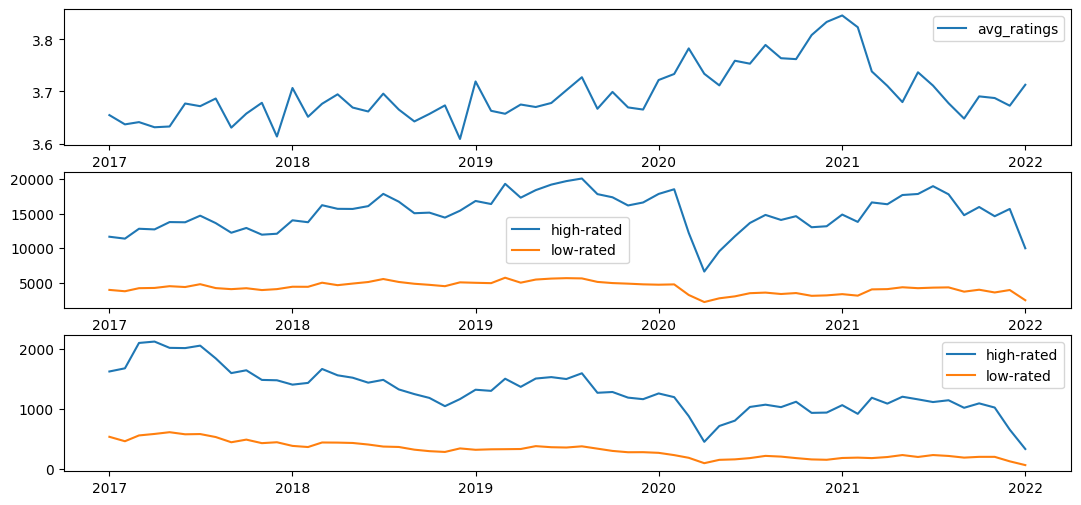

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(13, 6))

axs[0].plot(time_rating_df['year_month'], time_rating_df['avg_ratings'], label='avg_ratings')
axs[0].legend()

axs[1].plot(high_rated_df['year_month'], high_rated_df['review_count'], label='high-rated')
axs[1].plot(low_rated_df['year_month'], low_rated_df['review_count'], label='low-rated')
axs[1].legend()


axs[2].plot(high_rated_df['year_month'], high_rated_df['tip_count'], label='high-rated')
axs[2].plot(low_rated_df['year_month'], low_rated_df['tip_count'], label='low-rated')
axs[2].legend()

plt.show()

In [44]:
sentiment_df = review_df.loc[
    review_df['business_id'].isin(restaurant_df['business_id']),
    ['business_id', 'stars', 'useful', 'funny', 'cool']
]

sentiment_df = sentiment_df.groupby('business_id').agg(
    avg_ratings = pd.NamedAgg(column='stars', aggfunc='mean'),
    useful_count = pd.NamedAgg(column='useful', aggfunc='sum'),
    funy_count = pd.NamedAgg(column='funny', aggfunc='sum'),
    cool_count = pd.NamedAgg(column='cool', aggfunc='sum')
).reset_index()

display_dataframe(sentiment_df.head())

,business_id,avg_ratings,useful_count,funy_count,cool_count
0,---kPU91CF4Lq2-WlRu9Lw,4.500000,16,1,13
1,--0iUa4sNDFiZFrAdIWhZQ,3.214286,25,3,4
2,--epgcb7xHGuJ-4PUeSLAw,2.868421,20,8,7
3,--hF_3v1JmU9nlu4zfXJ8Q,4.733333,11,0,10
4,--lqIzK-ZVTtgwiQM63XgQ,1.937500,7,2,2


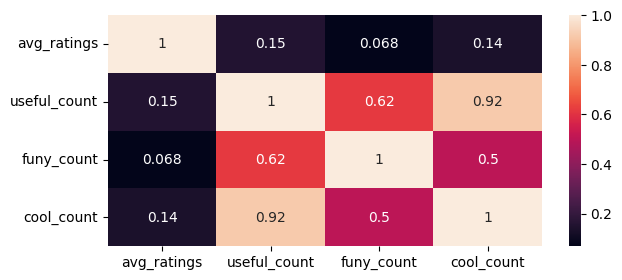

In [45]:
plt.figure(figsize=(7, 3))
sns.heatmap(sentiment_df.iloc[:,1:].corr(), annot=True)
plt.show()

In [46]:
temp_user_df = user_df.copy()
temp_user_df['elite_user'] = temp_user_df['elite'].apply(
    lambda x: 'non-elite' if x == '' else 'elite'
)

elite_user_df = temp_user_df.groupby('elite_user').agg(
    user_count = pd.NamedAgg(column='user_id', aggfunc='count'),
    total_review = pd.NamedAgg(column='review_count', aggfunc='sum')
).reset_index()

display_dataframe(elite_user_df.head())

,elite_user,user_count,total_review
0,elite,91198,20484441
1,non-elite,1896699,26021235


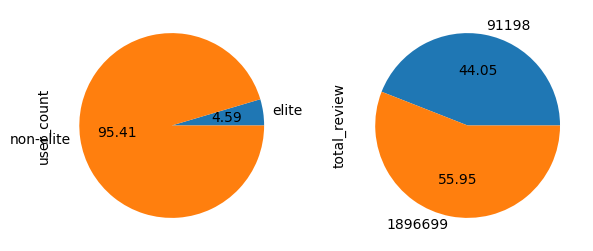

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

for i, ax in enumerate(axs):
    elite_user_df.iloc[:, i+1].plot(
        kind='pie',
        ax=axs[i],
        autopct='%.2f',
        labels=elite_user_df.iloc[:, i]
    )